# spanish texts

## text corpus

In [1]:
import pandas as pd 

In [2]:
import pandas as pd
corpus = pd.read_csv('corpus.txt', delimiter = "\t", header=None)
corpus.columns = ['texts']

In [3]:
corpus = list(corpus['texts'])

In [4]:
corpus[:15]

['El curso está en general bien constituido ',
 'Lo mejor de él es el cuerpo docente con el cual se establece una abierta',
 'El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 'disminuir el numero de alumnos por mesas ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Deberian haber mas practicos ',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'Que las solemnes sigan siendo separadas ',
 'sigan con los seminarios hechos desde la casa',
 'que se aconseje un libro para el estudio de una determinada materia',
 'capítulos a leer para obtener la información desde una fuente que le aporte para el aprendizaje.']

In [5]:
def tokenize(s):
    return s.split(' ')

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
!pip install -U pip setuptools wheel

     |████████████████████████████████| 1.6 MB 33.8 MB/s eta 0:00:01
     |████████████████████████████████| 819 kB 70.7 MB/s eta 0:00:01
  Attempting uninstall: wheel
    Found existing installation: wheel 0.36.2
    Uninstalling wheel-0.36.2:
      Successfully uninstalled wheel-0.36.2
  Attempting uninstall: setuptools
    Found existing installation: setuptools 49.6.0.post20210108
    Uninstalling setuptools-49.6.0.post20210108:
      Successfully uninstalled setuptools-49.6.0.post20210108
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [8]:
pip install -U spacy

     |████████████████████████████████| 5.9 MB 14.1 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 73.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 302 kB/s  eta 0:00:01
     |████████████████████████████████| 456 kB 53.5 MB/s eta 0:00:01
     |████████████████████████████████| 622 kB 62.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 47.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 24.6 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 6.7 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
!python -m spacy download es_dep_news_trf

     |████████████████████████████████| 410.0 MB 6.3 kB/s eta 0:00:011   |                                | 716 kB 24.2 MB/s eta 0:00:17
     |████████████████████████████████| 40 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 2.6 MB 36.0 MB/s eta 0:00:01
     |████████████████████████████████| 831.4 MB 3.6 kB/s  eta 0:00:01     |████████▏                       | 210.8 MB 68.9 MB/s eta 0:00:10     |███████████████▌                | 402.4 MB 65.6 MB/s eta 0:00:07     |█████████████████▍              | 451.6 MB 65.6 MB/s eta 0:00:06 eta 0:00:03     |████████████████████████████▉   | 749.4 MB 87.7 MB/s eta 0:00:01�██ | 808.0 MB 42.3 MB/s eta 0:00:01
     |████████████████████████████████| 998 kB 53.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 36.8 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 40.6 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [10]:
import spacy
nlp = spacy.load('es_dep_news_trf')

In [11]:
def remove_accents(raw_text):

    raw_text = re.sub(u"[àáâãäå]", 'a', raw_text)
    raw_text = re.sub(u"[èéêë]", 'e', raw_text)
    raw_text = re.sub(u"[ìíîï]", 'i', raw_text)
    raw_text = re.sub(u"[òóôõö]", 'o', raw_text)
    raw_text = re.sub(u"[ùúûü]", 'u', raw_text)
    return raw_text 

In [356]:
from spacy.lang.es.stop_words import STOP_WORDS
import re

def clean(sentence):
    table = str.maketrans({key: None for key in '``!"#$%&\¿()*+,-./:;<=>?@[\\]_{|}'})
    doc = nlp(sentence)
    sentence = [token.lemma_ for token in doc if (token.pos_=='NOUN')]
    sentence=list(filter(None, [w.lower().translate(table) for w in sentence]))
    sentence = [w for w in sentence if w not in STOP_WORDS]
    #language=[[w for w in s if w!="''"] for s in language] 
    #language=[[w for w in s if w!='̃'] for s in language] 
    sentence=[remove_accents(w) for w in sentence if not w.isdigit()]
    return sentence

In [357]:
clean('El gran curso está,, disposición ün en general; bien constituido ')

['curso', 'disposicion']

## basic statistics: types and tokens

In [358]:
#clean_corpus_all = [clean(sentence) for sentence in corpus]
#index_sentences = dict(zip(range(len(clean_corpus_all),clean_corpus_all)))
clean_corpus = []
CORPUS = []
for i in range(len(corpus)):
    C = clean(corpus[i])
    if len(C)>1:
        clean_corpus+=[C]
        CORPUS+=[corpus[i]]

In [359]:
clean_corpus[:5]

[['orden', 'contenido'],
 ['contenido', 'clase', 'bibliografia'],
 ['dinamica', 'prueba', 'practica'],
 ['mesa', 'practico'],
 ['numero', 'alumno', 'mesa']]

In [360]:
from collections import Counter

In [361]:
words =[item for sublist in clean_corpus for item in sublist]
number_tokens = len(words)
number_types = len(set(words))
print(number_tokens,number_types)

748 251


## graphs!

In [362]:
import networkx as nx

In [363]:
## adjacency graph
## n_sent: graph with n_sent sentences

def GoW(radius=4):
    G=nx.Graph()
    for sentence in clean_corpus:
        if len(sentence)>1:
            pairs=[]
            for r in list(range(1,radius+1)):
                pairs+=list(zip(sentence,sentence[r:]))#+list(zip(sentence,sentence[2:]))+list(zip(sentence,sentence[3:]))
            for pair in pairs:
                if G.has_edge(pair[0],pair[1])==False:
                    G.add_edge(pair[0],pair[1],weight=1)
                else:
                    x=G[pair[0]][pair[1]]['weight']
                    G[pair[0]][pair[1]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)      
    return G.subgraph(Gcc[0]).copy()

In [364]:
graph_text = GoW()

In [365]:
graph_text.nodes()

NodeView(('orden', 'contenido', 'clase', 'bibliografia', 'dinamica', 'prueba', 'practica', 'mesa', 'practico', 'numero', 'alumno', 'aprendizaje', 'ayudantia', 'estructura', 'seminario', 'casa', 'libro', 'estudio', 'materia', 'capitulo', 'informacion', 'fuente', 'profesor', 'limit', 'ayuda', 'teorica', 'pelvi', 'bloque', 'atencion', 'hilo', 'caso', 'instancia', 'forma', 'horario', 'yincana', 'imagenologia', 'sala', 'semestre', 'distribucion', 'torax', 'cuello', 'continuacion', 'relacion', 'inervacion', 'irrigacion', 'desempeño', 'estudiante', 'disposicion', 'ambiente', 'alumnado', 'guia', 'autorregulacion', 'actividad', 'posibilidad', 'nota', 'control', 'revision', 'ayudante', 'presencia', 'opcion', 'video', 'operacion', 'diseccion', 'cadaver', 'organizacion', 'patologia', 'paciente', 'pregunta', 'punto', 'porcion', 'tuba', 'camara', 'puesto', 'dibujo', 'maqueta', 'temario', 'conocimiento', 'critica', 'prioridad', 'ojo', 'criterio', 'seleccion', 'repaso', 'docente', 'paso', 'laboratorio

In [366]:
import matplotlib.pyplot as plt

def plot_graph(G):
    fig, ax = plt.subplots(dpi=800)
    pos = nx.kamada_kawai_layout(G)
    labels={i:i for i in G.nodes}
    nx.draw_networkx_nodes(G, pos, node_size = 10, node_color='orange') 
    nx.draw_networkx_edges(G, pos, alpha=0.75,width=0.25,edge_color='lime')
    nx.draw_networkx_labels(G,pos,labels,alpha=0.95,font_size=3,font_color='k')
    plt.axis('off')
    plt.show()

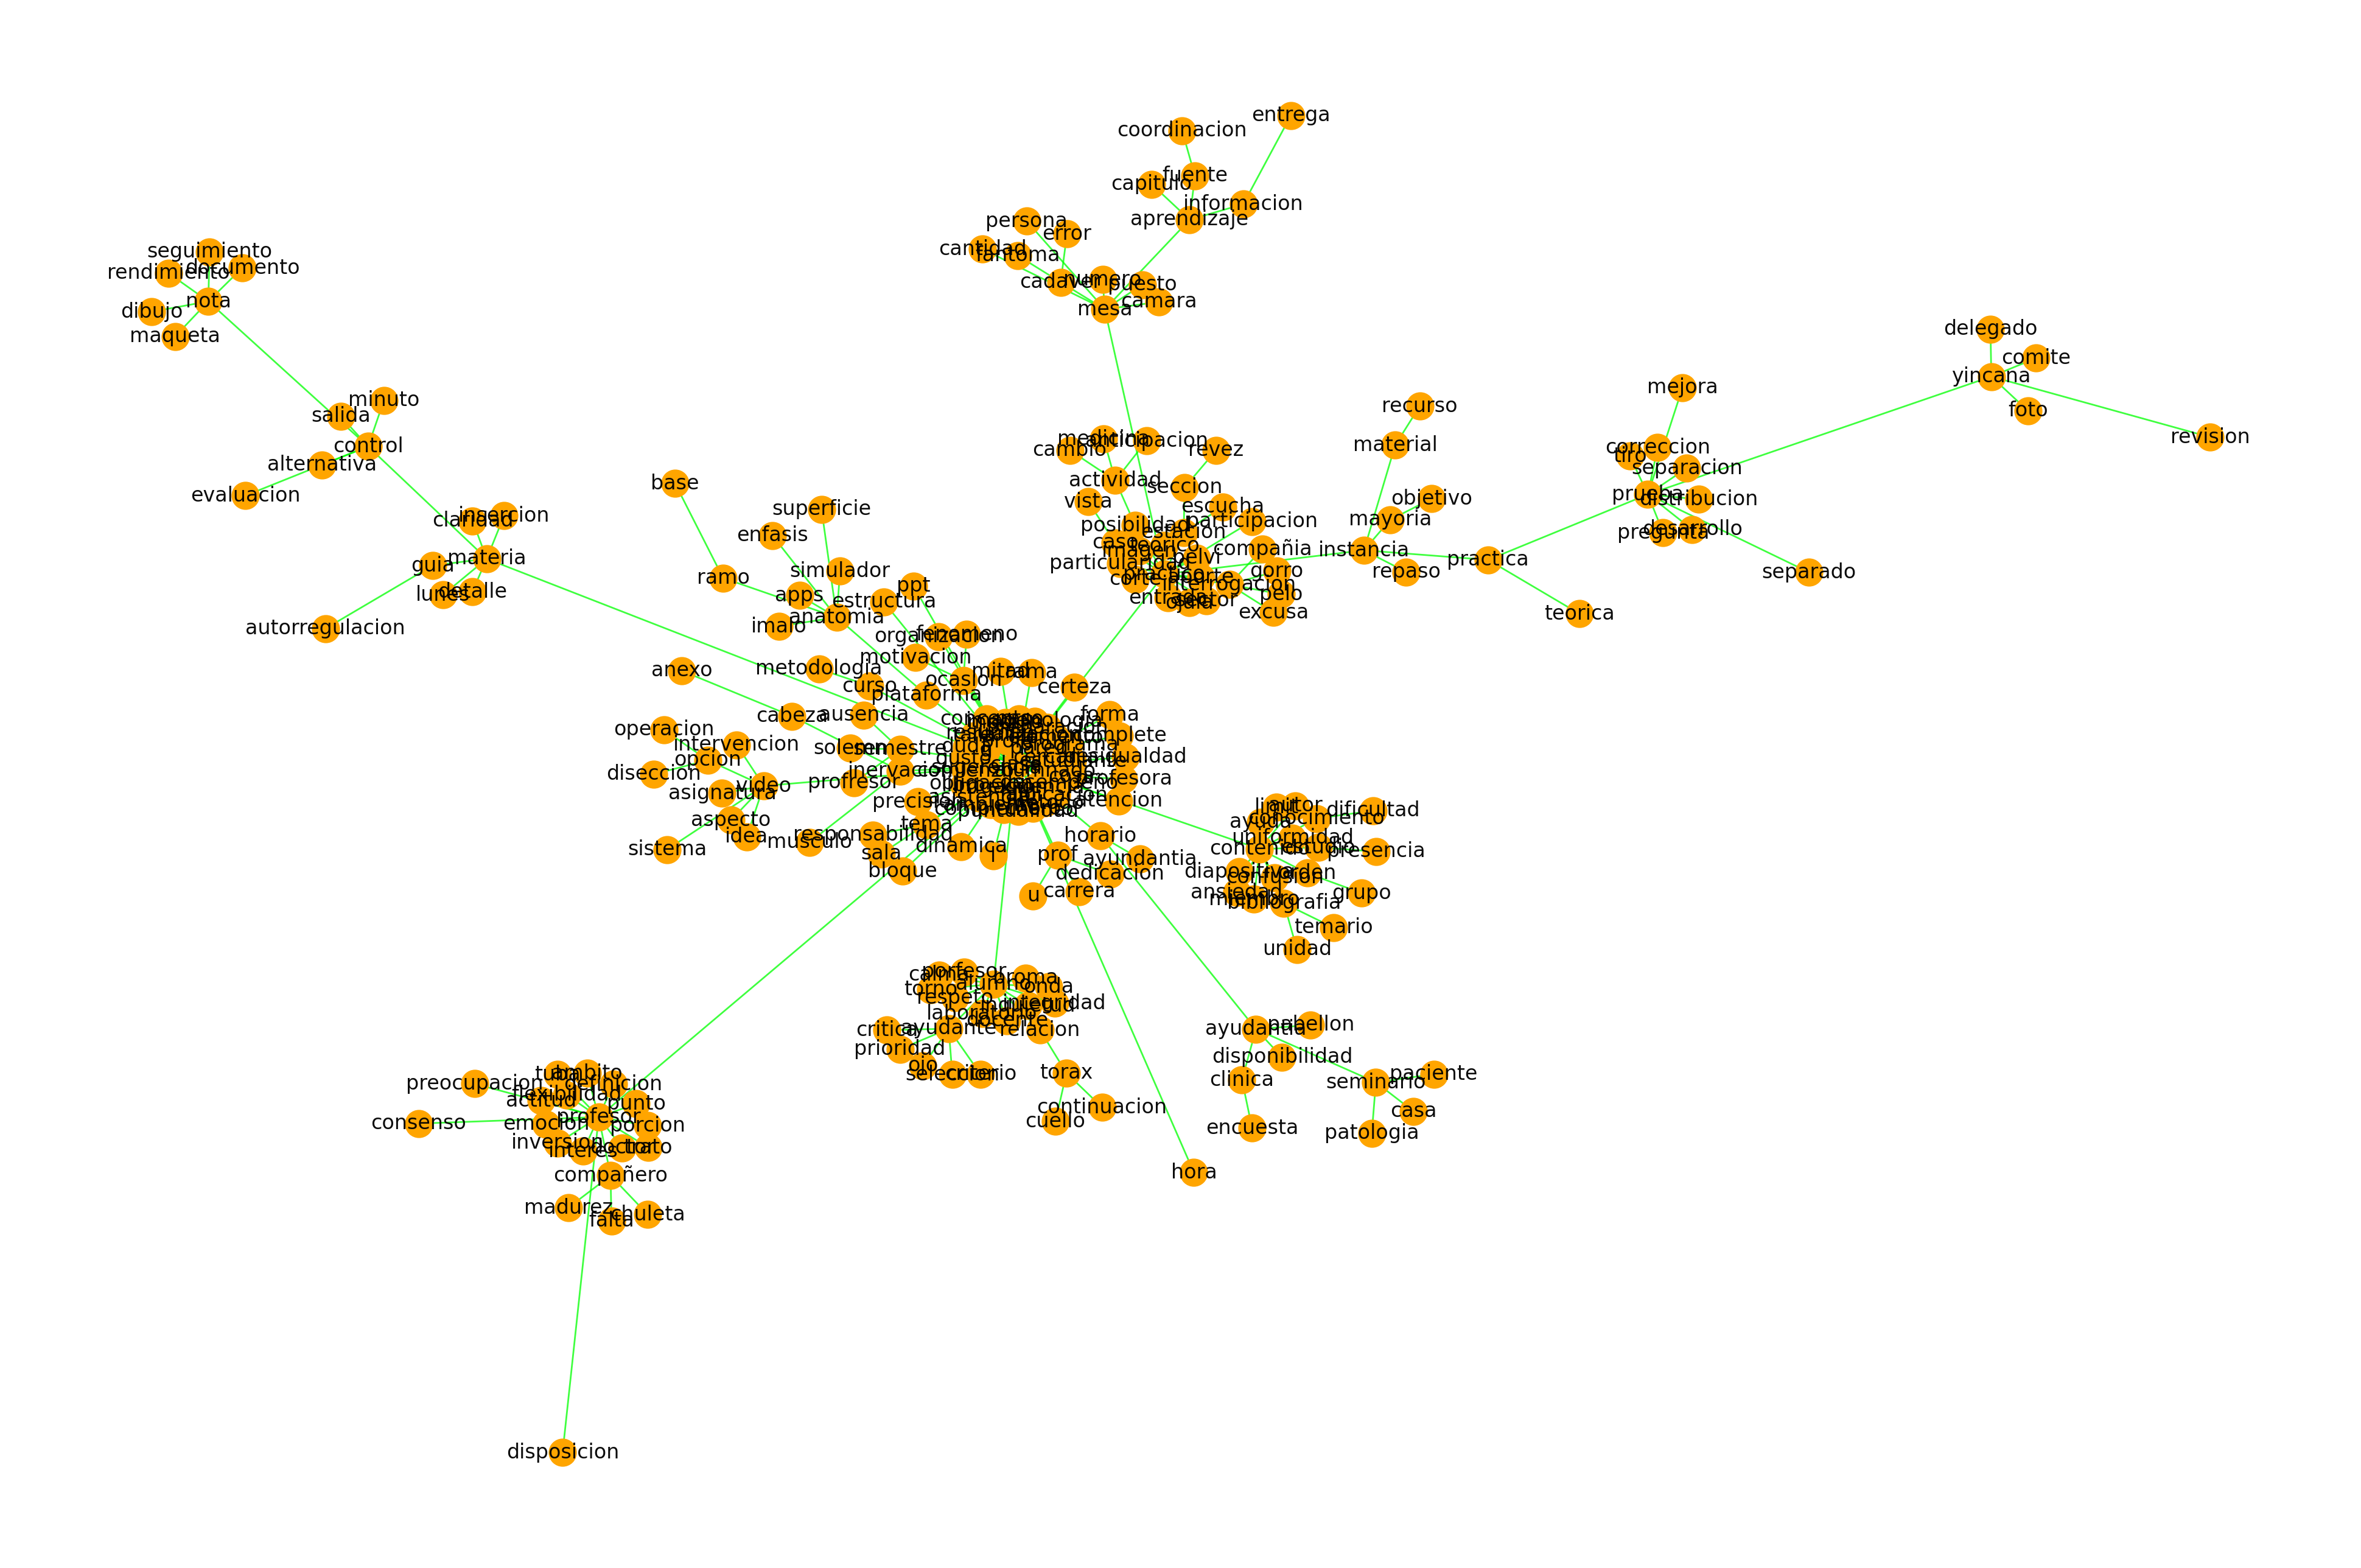

In [367]:
plot_graph(nx.maximum_spanning_tree(graph_text))

### main core

In [368]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
core_numbers = dict(nx.core_number(graph_text))
main_core = nx.k_core(graph_text)

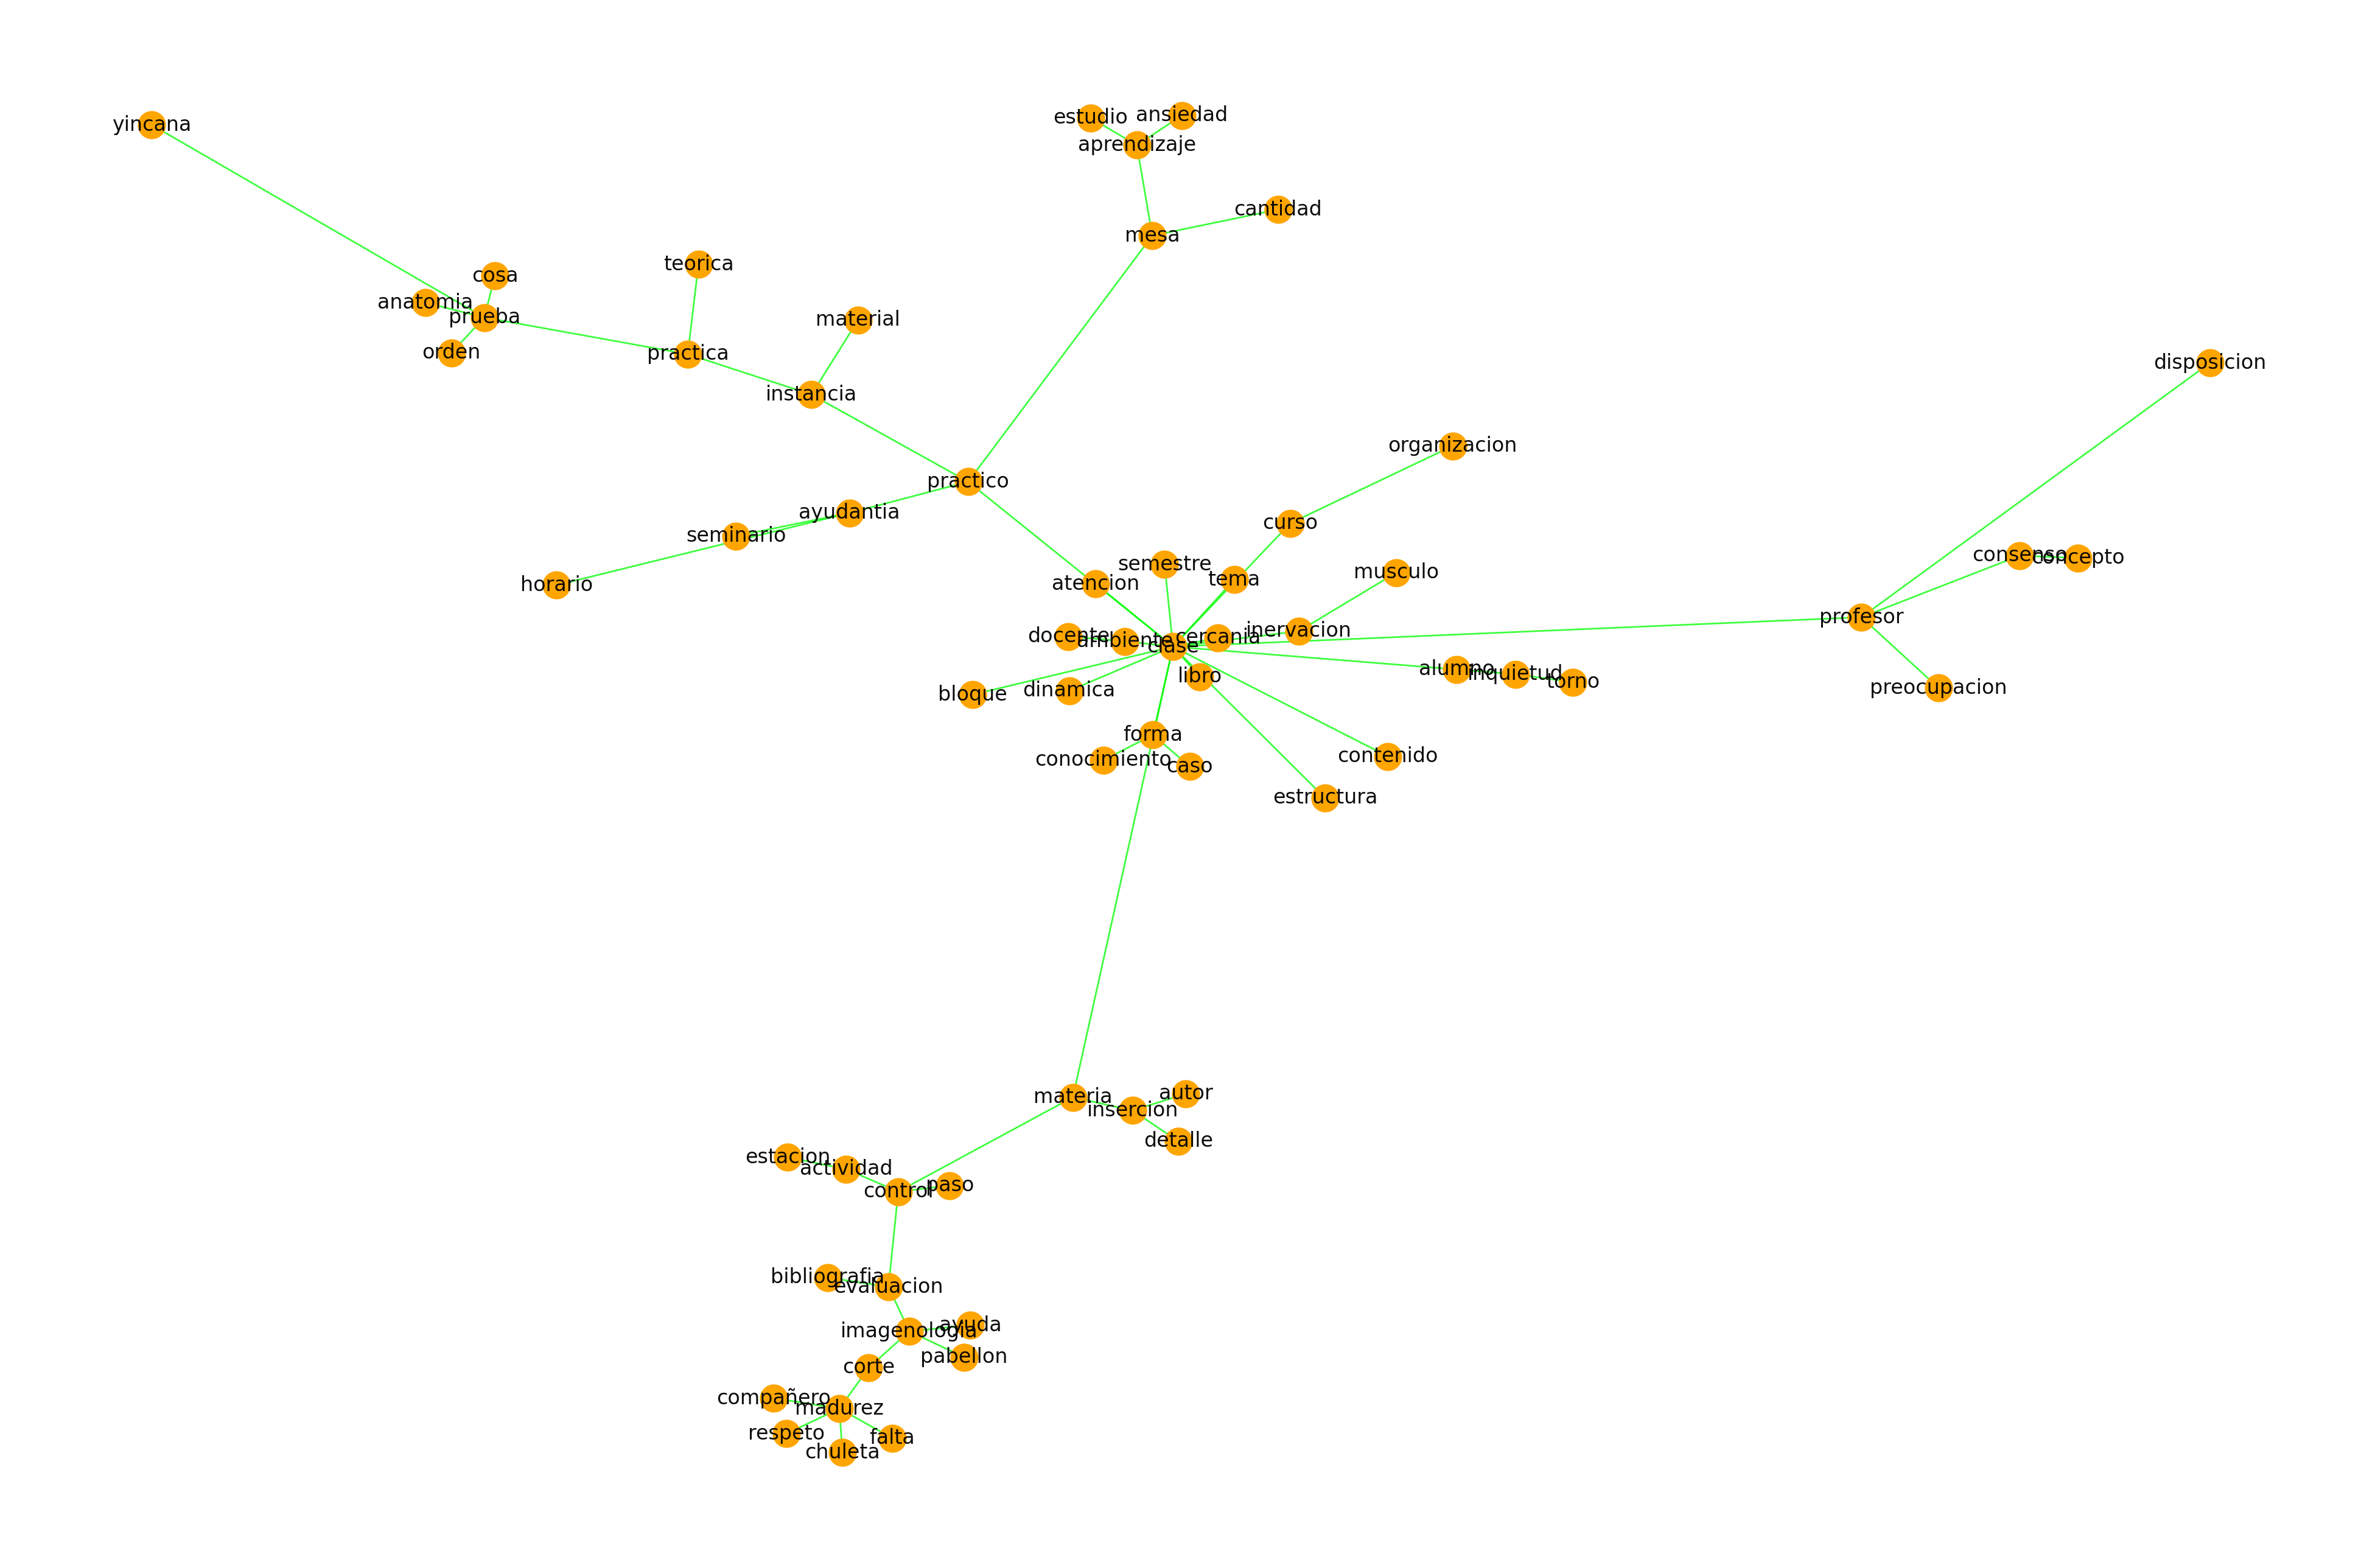

In [369]:
plot_graph(nx.maximum_spanning_tree(main_core))

## community structure

In [370]:
!pip install python-louvain

In [371]:
import community as community_louvain

In [372]:
partition = community_louvain.best_partition(main_core,resolution=1)

In [373]:
len(set(partition.values()))

6

In [374]:
from collections import defaultdict

v = defaultdict(list)

for key, value in sorted(partition.items()):
    v[value].append(key)

In [375]:
partition = dict(v)

In [376]:
partition

{2: ['actividad',
  'anatomia',
  'ayudantia',
  'cantidad',
  'control',
  'evaluacion',
  'horario',
  'imagenologia',
  'pabellon',
  'seminario'],
 4: ['alumno',
  'ambiente',
  'aprendizaje',
  'cercania',
  'cosa',
  'disposicion',
  'inquietud',
  'mesa',
  'practico',
  'preocupacion',
  'profesor',
  'semestre',
  'torno'],
 5: ['ansiedad',
  'atencion',
  'autor',
  'bibliografia',
  'bloque',
  'clase',
  'concepto',
  'consenso',
  'contenido',
  'detalle',
  'estructura',
  'estudio',
  'inervacion',
  'insercion',
  'libro',
  'materia',
  'musculo',
  'tema'],
 0: ['ayuda',
  'caso',
  'conocimiento',
  'dinamica',
  'forma',
  'instancia',
  'material',
  'practica',
  'prueba',
  'teorica',
  'yincana'],
 3: ['chuleta', 'compañero', 'corte', 'falta', 'madurez', 'respeto'],
 1: ['curso', 'docente', 'estacion', 'orden', 'organizacion', 'paso']}

In [377]:
def sum_cores(core_numbers,node,G):
    N = list(dict(G[node]).keys())
    C = 0
    for nodenode in N:
        C+=core_numbers[nodenode]
    return C

In [378]:
partition_core = {key:{word:sum_cores(core_numbers,word,graph_text) for word in partition[key]} for key in partition.keys()}

In [379]:
partition_core = {key:dict(sorted(partition_core[key].items(), key=lambda item: item[1],reverse=True)) for key in partition_core.keys()}

In [380]:
partition_core

{2: {'control': 85,
  'anatomia': 84,
  'ayudantia': 52,
  'actividad': 49,
  'seminario': 47,
  'cantidad': 44,
  'imagenologia': 40,
  'horario': 37,
  'pabellon': 35,
  'evaluacion': 32},
 4: {'profesor': 183,
  'practico': 153,
  'alumno': 116,
  'semestre': 61,
  'aprendizaje': 58,
  'disposicion': 55,
  'ambiente': 43,
  'mesa': 43,
  'preocupacion': 41,
  'cercania': 34,
  'cosa': 33,
  'inquietud': 25,
  'torno': 25},
 5: {'clase': 303,
  'materia': 134,
  'contenido': 88,
  'inervacion': 57,
  'consenso': 53,
  'autor': 49,
  'estudio': 45,
  'atencion': 38,
  'concepto': 37,
  'tema': 34,
  'musculo': 33,
  'libro': 32,
  'estructura': 30,
  'ansiedad': 29,
  'bloque': 29,
  'bibliografia': 28,
  'detalle': 25,
  'insercion': 25},
 0: {'instancia': 107,
  'yincana': 76,
  'prueba': 74,
  'practica': 52,
  'forma': 48,
  'material': 42,
  'caso': 39,
  'conocimiento': 37,
  'teorica': 32,
  'ayuda': 30,
  'dinamica': 25},
 3: {'corte': 50,
  'respeto': 39,
  'compañero': 37,
 

## clustering!

In [381]:
cluster_sentences = {group:[] for group in partition.keys()}

In [382]:
## https://aclanthology.org/W04-3252.pdf

import numpy as np

def similarity(L1,L2):
    return len(list(set(L1) & set(L2)))/(np.log(len(L1))+np.log(len(L2)))

In [383]:
import numpy as np

def similarity_core(D,L2):
    if len(list(set(D.keys()) & set(L2)))==0:
        return 0
    else:
        return sum([D[word] for word in L2 if word in D.keys()])

In [384]:
import operator

for sentence in clean_corpus:
    D = {}
    for group in partition.keys():
        D[group]=similarity_core(partition_core[group],sentence)
    key=max(D.items(), key=operator.itemgetter(1))[0]
    cluster_sentences[key]+=[CORPUS[clean_corpus.index(sentence)]]

In [385]:
cluster_sentences_label = {}
for key in cluster_sentences.keys():
    key_label = max(partition_core[key].items(), key=operator.itemgetter(1))[0]
    cluster_sentences_label[key_label]=cluster_sentences[key]

In [386]:
DF=pd.DataFrame.from_dict(cluster_sentences_label,orient='index').T

In [387]:
DF.to_csv('grupos.csv')

In [388]:
DF

,control,profesor,clase,instancia,corte,curso
0,sigan con los seminarios hechos desde la casa,Que se agregue una mesa mas en los practicos a...,El orden de los contenido,Que se mantenga la dinamica de separar por dia...,muchos compañeros llamaban chuletas a los cort...,Orden y organizacion
1,Ayudantia en horarios más comodos,disminuir el numero de alumnos por mesas,Que se pongan de acuerdo si se va a prorizar e...,Me gustaria que se hicieran mas ayudantías ant...,None,un docente diferente en el paso por el laborat...
2,Profundizar mas en los casos clinicos de semin...,6 a 8 alumnos por mesa permitiendo un aprendiz...,"que los practicos sean mas clase, en vez de de...",Mas casos clinicos o instancias para desarroll...,None,muchos por sección muchas veces uno no alcanza...
3,"Ver torax despues de cuello, para mantener una...",capítulos a leer para obtener la información d...,que se aconseje un libro para el estudio de un...,Que se pudieran mantener las solemnes teórica ...,None,que se vigile un poco más el orden de los grupos
4,Me gustaría que se mantuviera que nos proporci...,Debería haber un acuerdo previo entre los prof...,ayuda mas si es la teórica primero ya que se a...,Encuentro mejor hacer la yincana antes de la p...,None,la organización del curso
...,...,...,...,...,...,...
84,None,None,Mejoraría las salas de las clases teóricas,None,None,None
85,None,None,Que las clases sean un poco más ordenadas en c...,None,None,None
86,None,None,Mantener lo completa que son las clases y lo c...,None,None,None
87,None,None,Agregaría ayudantías para las materias que fue...,None,None,None


## k crust

In [389]:
graph_text.remove_edges_from(nx.selfloop_edges(graph_text))
k_crust = nx.k_crust(graph_text)

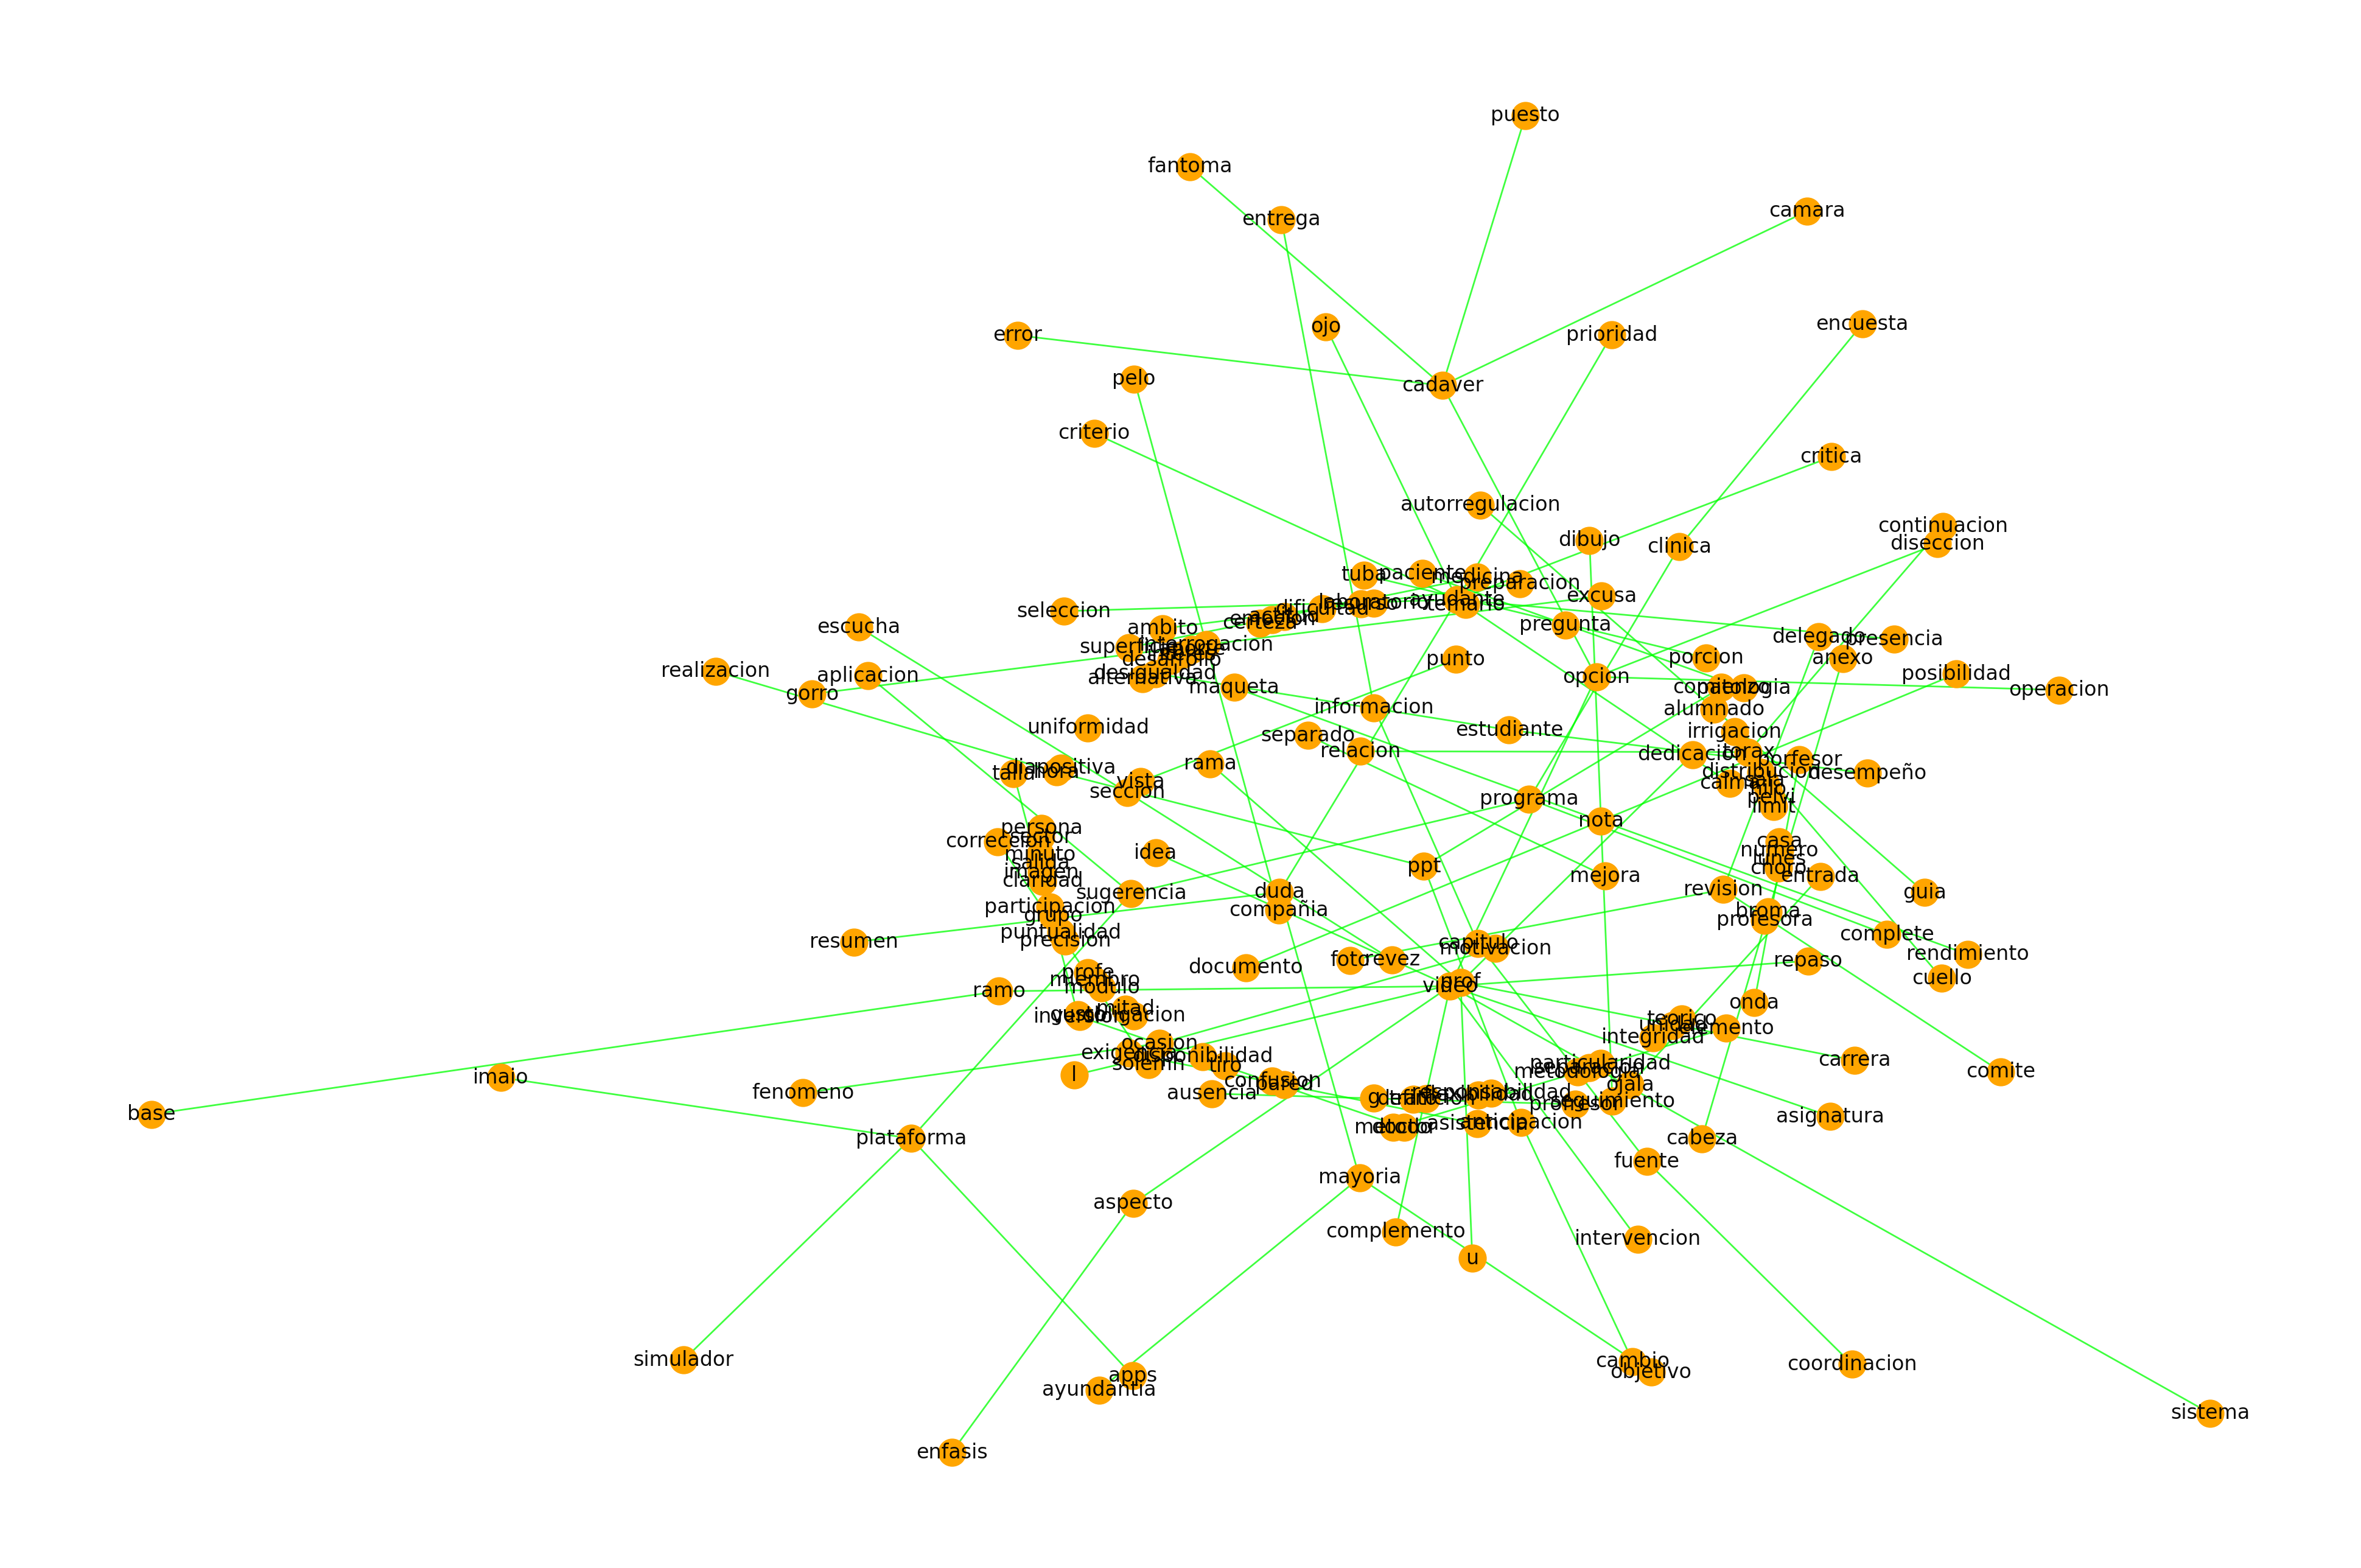

In [390]:
plot_graph(nx.maximum_spanning_tree(k_crust))

In [391]:
core_numbers_core = {key:core_numbers[key] for key in core_numbers.keys() if key in main_core.nodes()}
core_numbers_crust = {key:core_numbers[key] for key in core_numbers.keys() if key in k_crust.nodes()}

In [392]:
sim_sentences = []

In [393]:
for sentence in clean_corpus:
    sim_core=similarity_core(core_numbers_core,sentence)
    sim_crust=similarity_core(core_numbers_crust,sentence)
    sim_sentences+=[[CORPUS[clean_corpus.index(sentence)],sim_core,sim_crust]]

In [394]:
len(sim_sentences)

260

In [395]:
sim_sentences_filtered = [s for s in sim_sentences if s[1]>s[2] and s[2]==0]

In [396]:
len(sim_sentences_filtered)

92

In [397]:
sim_sentences_filtered = [s[0] for s in sim_sentences_filtered]

In [398]:
sim_sentences_filtered

['El orden de los contenido',
 'Que se pongan de acuerdo si se va a prorizar el contenido de las clases o el de la bibliografía',
 'Que se mantenga la dinamica de separar por dias las prueba teorica de la práctica',
 'Que se agregue una mesa mas en los practicos a fin ',
 '6 a 8 alumnos por mesa permitiendo un aprendizaje mas personalizado',
 'Me gustaria que se hicieran mas ayudantías antes de las pruebas ',
 'que los practicos sean mas clase, en vez de dejarnos solos a identificar estructuras.',
 'que se aconseje un libro para el estudio de una determinada materia',
 'ayuda mas si es la teórica primero ya que se aprenden contenidos de la practica en el estudio de la teorica.',
 'Creo  que tener clase teórica separada en varios días ayudaría más, que tener vario bloques juntos. ',
 'Mas casos clinicos o instancias para desarrollarnos de forma clínica',
 'Ayudantia en horarios más comodos',
 'Que se pudieran mantener las solemnes teórica y practica en instancias separadas',
 'Encuentro

## k-means on graphs!

In [399]:
import numpy.linalg as la
import scipy.cluster.vq as vq

In [424]:
g = graph_text
#g = main_core

In [425]:
A = nx.adjacency_matrix(g,weight='weight')

In [426]:
D = np.diag(np.ravel(np.sum(A,axis=1)))
L = D - A

In [427]:
eigenvalues, eigenvectors = np.linalg.eig(L)

In [428]:
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

In [429]:
len(eigenvectors[:,1:32])

241

In [430]:
order = np.argsort(eigenvalues)
eigenvalues = eigenvalues[order]

In [431]:
eigenvalues[0:10]

array([-1.34141159e-15,  3.67156270e-01,  3.74805437e-01,  3.94176321e-01,
        4.38161346e-01,  4.67109997e-01,  5.42711214e-01,  5.72826916e-01,
        6.12448217e-01,  6.51533430e-01])

In [432]:
embedding_size = 3
v_0 = eigenvectors[:, order[0]]
v = eigenvectors[:, order[1:(embedding_size+1)]]

In [433]:
len(v)

241

In [434]:
embeddings = dict(zip(g.nodes(),[vector.tolist()[0] for vector in v]))

In [435]:
len(list(v))

241

In [436]:
X=[]

for node in g.nodes():
    X+=[embeddings[node]]

In [437]:
from sklearn.manifold import TSNE

X = TSNE(n_components=2,perplexity=15,init='pca',n_iter=1000,random_state=0).fit_transform(X)

In [438]:
#from sklearn.decomposition import KernelPCA
#transformer = KernelPCA(n_components=2, kernel='sigmoid')
#X = transformer.fit_transform(X)

In [439]:
x=list(zip(*list(X)))[0]
y=list(zip(*list(X)))[1]

In [440]:
XX=[]

for i in range(len(x)):
    XX+=[[x[i],y[i]]]

In [441]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for n_clusters in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(XX)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(XX, labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.36871433
For n_clusters = 3 The average silhouette_score is : 0.419374
For n_clusters = 4 The average silhouette_score is : 0.46765256
For n_clusters = 5 The average silhouette_score is : 0.44622648
For n_clusters = 6 The average silhouette_score is : 0.44457173
For n_clusters = 7 The average silhouette_score is : 0.45301604
For n_clusters = 8 The average silhouette_score is : 0.45117062
For n_clusters = 9 The average silhouette_score is : 0.4352041
For n_clusters = 10 The average silhouette_score is : 0.450355


In [448]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(XX)
labels = dict(zip(list(embeddings.keys()),kmeans.labels_))

In [449]:
v = defaultdict(list)

for key, value in sorted(labels.items()):
    v[value].append(key)
    
labels_group = dict(v)

In [450]:
colors_group = {0:['gold','o'],1:['m','s'],2:['palegreen','D'],3:['r','H']}

In [451]:
len(x)

241

In [452]:
labels_group.keys()

dict_keys([3, 0, 1, 2])

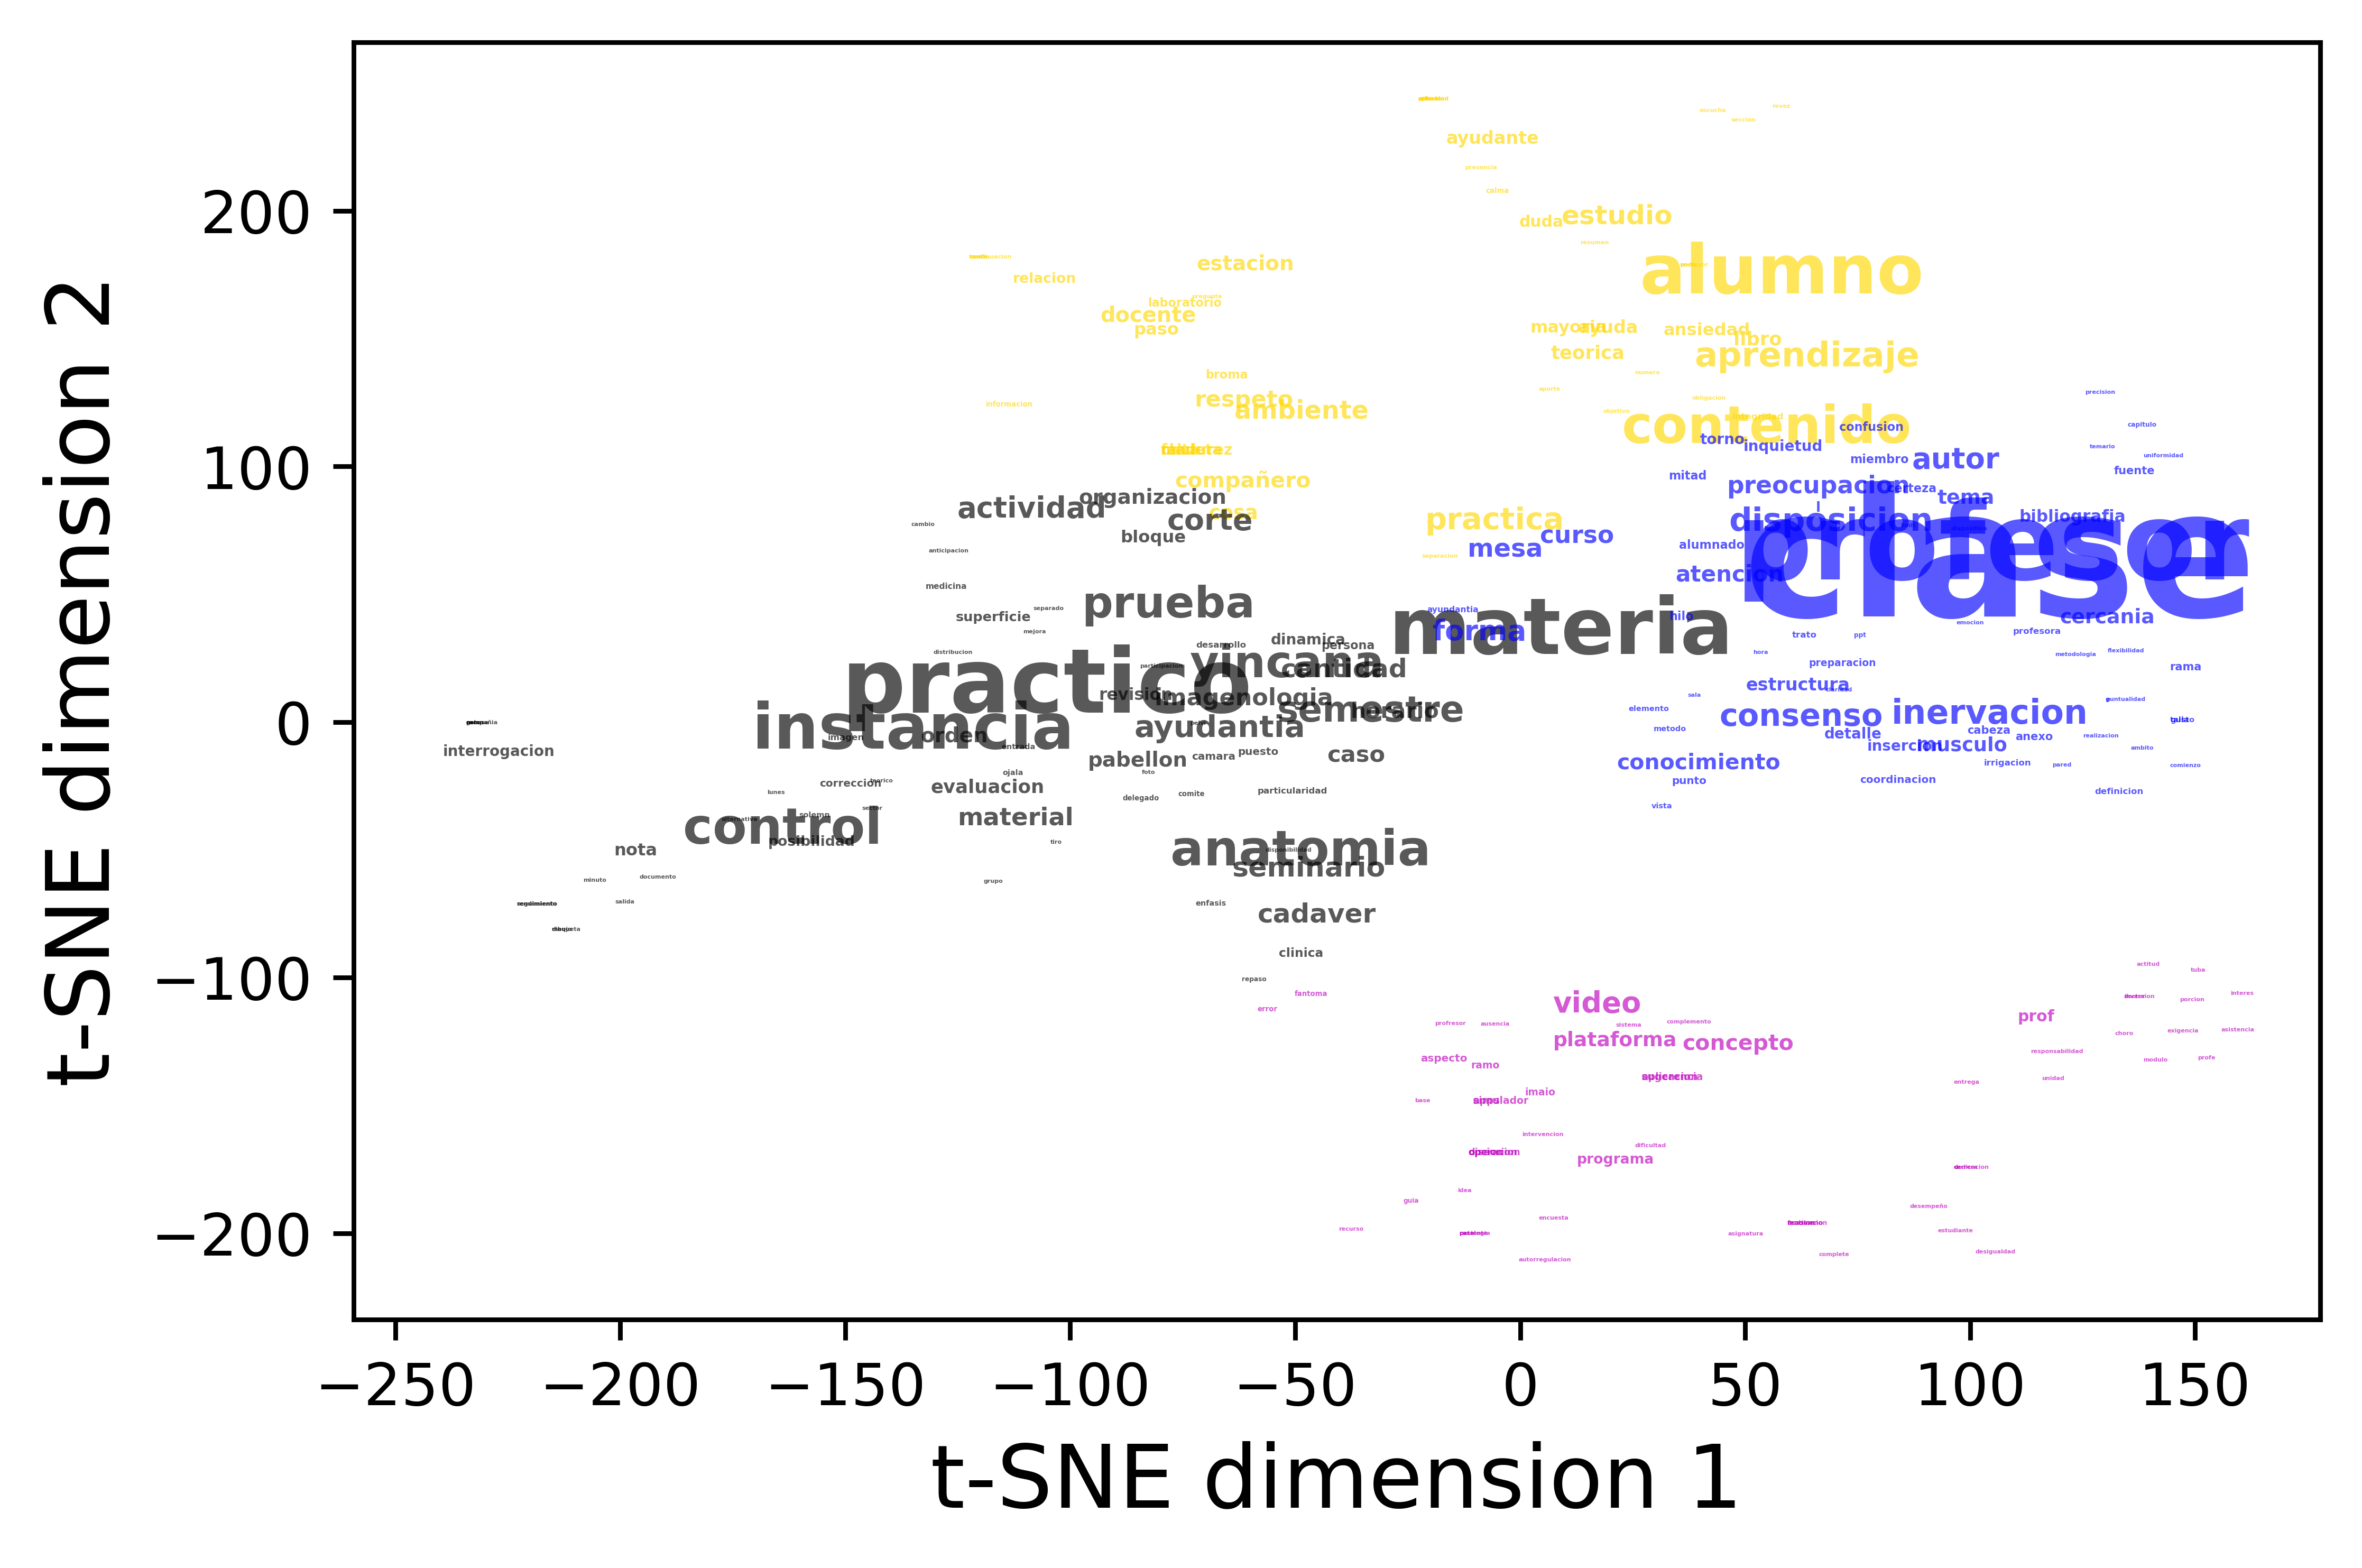

In [453]:
fig, ax = plt.subplots(dpi=800)

for group in labels_group.keys():
    
    ax.plot([x[i] for i in [list(embeddings.keys()).index(node) for node in embeddings.keys() if labels[node]==group]],[y[i] for i in [list(embeddings.keys()).index(node) for node in embeddings.keys() if labels[node]==group]],marker=colors_group[group][1],color=colors_group[group][0],markersize=0,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True)

#for fam in families:
    
#    ax.plot([x[i] for i in [list(embeddings.keys()).index(language) for language in embeddings.keys() if language in id_family.keys() and id_family[language]==fam]],[y[i] for i in [list(embeddings.keys()).index(language) for language in embeddings.keys() if language in id_family.keys() and id_family[language]==fam]],marker=colors[fam][1],color=colors[fam][0],markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=0,fillstyle='full',clip_on=True,label=fam)

for node in embeddings.keys():
    i=list(embeddings.keys()).index(node)
    font_size = sum_cores(core_numbers,node,g)/10
    if labels[node]==0:
        ax.annotate(node, weight='demi', color='k', xy=(x[i],y[i]), fontsize=font_size, alpha=0.65)
    elif labels[node]==1:
        ax.annotate(node, weight='demi', color='blue', xy=(x[i],y[i]), fontsize=font_size, alpha=0.65)
    elif labels[node]==2:
        ax.annotate(node, weight='demi', color='gold', xy=(x[i],y[i]), fontsize=font_size, alpha=0.65)
    else:
        ax.annotate(node, weight='demi', color='m', xy=(x[i],y[i]), fontsize=font_size, alpha=0.65)

plt.grid(False)
#plt.legend(loc='best',fontsize=5)
plt.ylabel(r't-SNE dimension 2',fontsize=15)
plt.xlabel(r't-SNE dimension 1',fontsize=15)
plt.rcParams.update({'font.size': 10})
plt.savefig('TSNE.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()